<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Build and Evaluate Your Models - Classification



---

> **Note**: this is intended to be a group work lab or a codealong with the instructor.


## Model Options

---

We now have a selection of models to utilize for your modeling practice session.



In [14]:
# Data science modules
import pandas as pd
import numpy as np

# Plotting modules
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Modeling modules
from sklearn.model_selection import train_test_split ##Train test split your data
from sklearn.linear_model import LogisticRegression ##Building a Linear Regressor
from sklearn.neighbors import KNeighborsClassifier #Building a KNN regressor
from sklearn.tree import DecisionTreeClassifier #Building a DT Regressor
from sklearn.ensemble import RandomForestClassifier #Building at RF classifier

# Evaluation modules
from sklearn import metrics

In [15]:
# Example of creating a model

#from sklearn.linear_model import LogisticRegression
#LR = LogisticRegression()
#X = glass[['al']]
#y = glass.household

#from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=2)

#LR.fit(X_train,y_train)

#y_pred = LR.predict(X_test)

In [16]:
# Cheat sheet
# Accuracy score of model
# model.score(X_test, y_test)

# True Positive, True Negative, False Positives, False Negatives
#tn, fp, fn, tp = metrics.confusion_matrix(y_true=true_value, y_pred= predicted_class).ravel()

## Lab Instructions

---

Utilize the models you have access to for an evaluation of the hitters dataset. Your outcome variable will be your NewLeague variable.

1. Import the hitters data
2. Do very minimal cleaning and create intial models for all three classifiers. Choose at least three variables and let them all be numeric.
3. Evaluate your models with Accuracy and True Positive Rate and False Positive Rate
4. Go back into your data and start to explore your variables (create at least three charts showing correlation, boxplots, scatter plots, etc.)
5. After you have done this EDA, will you keep your same variables? 
6. Create new models but this time choose a categorical variable to include. Create dummy variables for this categorial variable.'
7. Re-evaluate your models outputs

Bonus! Look at other evaluation metrics. https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

- Major League Baseball player data from 1986-87: [data](https://github.com/justmarkham/DAT8/blob/master/data/hitters.csv), [data dictionary](https://cran.r-project.org/web/packages/ISLR/ISLR.pdf) (page 7)
- Each observation represents a player.
- **Goal:** Predict player new league.

In [31]:
path ='../data/hitters.csv'
hitters = pd.read_csv(path)
hitters['League'] = pd.factorize(hitters.League)[0]
hitters['Division'] = pd.factorize(hitters.Division)[0]
hitters['NewLeague'] = pd.factorize(hitters.NewLeague)[0]

In [32]:
hitters.isnull().sum()

AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

In [33]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
X = hitters[['HmRun','RBI','Years']]
y = hitters.NewLeague

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=2)

LR.fit(X_train,y_train)

y_pred = LR.predict(X_test)

metrics.accuracy_score(y_test,y_pred)

0.41975308641975306

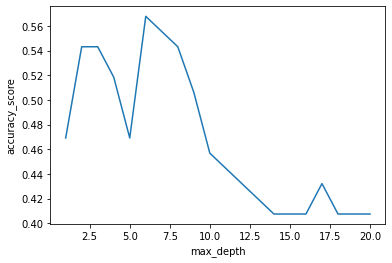

In [47]:
from sklearn.tree import DecisionTreeClassifier

# List of values to try for max_depth:
max_depth_range = list(range(1, 21))

# List to store the average RMSE for each value of max_depth:
RMSE_scores = []
accuracy_score = []

# Use 10-fold cross-validation with each value of max_depth.
from sklearn.model_selection import cross_val_score
for depth in max_depth_range:
    treereg = DecisionTreeClassifier(max_depth = depth,random_state=1)
    treereg.fit(X_train,y_train)
    accuracy_score.append(treereg.score(X_test,y_test))

plt.plot(max_depth_range,accuracy_score);
plt.xlabel('max_depth');
plt.ylabel('accuracy_score');

In [ ]:
from sklearn.ensemble import RandomForestClassifier

accuracy_s = []
n_estimator_range = list(range(1, 200))

for num in n_estimator_range:
    rfreg = RandomForestClassifier(n_estimators = num, random_state = 45)
    rfreg.fit(X_train,y_train)
    accuracy_s.append(rfreg.score(X_test,y_test))

plt.plot(n_estimators_range,accuracy);
plt.xlabel('n_estimator');
plt.ylabel('accuracy_s');    

# true negative, false positive, false negative, true positive
#tn, fp, fn, tp = metrics.confusion_matrix(y_true= y_test, y_pred = y_pred).ravel()

# accuracy score
#print(rfreg.score(n_estimators_range, y_test))

#print(tn)
#print(fp)
#print(fn)
#print(tp)